# GOPH 619 Lab1

Benjamin Corner 

30027458

### <b>Question 1:</b>
Express the number 1.481 in floating point binary format, as
discussed in class. Clearly show the binary strings representing the
exponent and the mantissa. At what digit does the “true error” in the
mantissa reach zero? Do you think that your result has zero round-off
error? Explain

In [1]:
######
import numpy as np
import matplotlib.pyplot as plt
import math

####Convert Decimal to mantissa and exponent
def decimal_2_mne(num):
    ########Convert decimal to base 2
    #Find if num is greater or less than 1
    n = 0
    while True:
        if num >1:
            num /= 2
            e = n+1
            n += 1
            #print(remainder,'if')
        else:
            num *= 2
            e = n-1
            n +=1
            #print(remainder,'else')
        if num>=0.5 and num <1:
            break
    print("Mantissa #:", num, "Exponent #:", e)
    return num, e

value = 1.481
man, e = decimal_2_mne(value)


####Convert mantissa and exponent to binary
def me_2_bin(m,e):
    ####### Converts mantissa to binary
    rem = m
    sb = np.zeros(53)
    #i = 0
    for i, k in enumerate(range(-1,-53,-1)):
        if rem >= 2**k:
            #print("remainder:", rem, "2^k:", 2**k, "k:",k)
            sb[i] = 1
            rem -= 2**k
        # i +=1
        # else:
        #     sb[i]= 0   
        #     i +=1
    ########
    #Convert exponent to binary
    rem = e
    se = np.zeros(10)
    i = 0
    for k in range(9,-1,-1):
        if rem >= 2**k:
            se[i] = 1
            rem -= 2**k
        i +=1
        # else:
        #     se[i] = 0
        #     i +=1
    print("Exponent:", se, "Mantissa:", sb)
    return sb,se

mantissa, exponent = me_2_bin(man,e)


Mantissa #: 0.7405 Exponent #: 1
Exponent: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Mantissa: [1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0.]


##### <b>At what digit does the True error in the Mantissa reach zero? </b>
The True error in the Mantissa reaches zero at the 53rd digit because that is max for double precision

##### <b>Does the result have roundoff error?</b>


## <b>Question 2 </b>

Show the Taylor series for sin(x) for zero- through fifth-order.
Evaluate sin(x) for xi+1 = π/3 using a base point of xi = π/4 using the zero-
through fifth-order Taylor series expansions. Calculate the true and
approximate relative error for each estimate. Why is π/4 a convenient
base point for this function?

Iterations: 0 solution: 0.7071067811865475 True Error: 18.3503419072274 Approximate Error: None
Iterations: 1 solution: 0.8922269036098127 True Error: -3.0254885954703363 Approximate Error: 20.748099129750262
Iterations: 2 solution: 0.8679947362499555 True Error: -0.22739892581800955 Approximate Error: 2.791741279970057
Iterations: 3 solution: 0.8658800807233364 True Error: 0.016780461689357797 Approximate Error: 0.24422036881279358
Iterations: 4 solution: 0.8660184846039052 True Error: 0.0007989581487078311 Approximate Error: 0.01598163122719495
Iterations: 5 solution: 0.8660257314141455 True Error: -3.783141989694536e-05 Approximate Error: 0.0008367892520355209


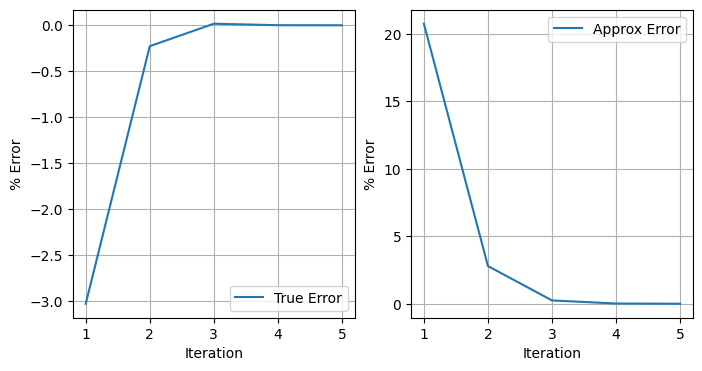

In [27]:

def taylor_sin(x,x_base, order=5):

    """ n-order taylor series for sin 
    """
    h = x - x_base
    fun = math.sin(x_base)
    der1 = math.cos(x_base)
    der2 = -1*math.sin(x_base)
    der3 = -1*math.cos(x_base)
    der4 = math.sin(x_base)
    der5 = math.cos(x_base)
    der =[fun,der1,der2,der3,der4,der5]
    true_a = math.sin(x)

    ea = None
    fact = 1
    #n = 5
    et_array = np.zeros(order+1)
    ea_array = np.zeros(order+1)

    for i in range(order+1):
        if i ==0:
            sol = der[i]
            et = ((true_a-sol)/(true_a))*100    
        if i != 0:
            oldsol =sol
            fact *=i
            sol = oldsol + (der[i]/fact)*h**i
            #sol = oldsol + (der[i]/math.factorial(i))*h**i
            et = ((true_a-sol)/(true_a))*100
            ea = abs((sol - oldsol) / sol)*100
            et_array[i] = et
            ea_array[i] = ea
        print("Iterations:", i, "solution:",sol,"True Error:",et,"Approximate Error:", ea)

    iter = np.array([1,2,3,4,5])
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(iter,et_array[1:],label="True Error")
    plt.xlabel("Iteration")
    plt.ylabel(f"% Error")
    plt.legend()
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(iter,ea_array[1:],label="Approx Error")
    plt.xlabel("Iteration")
    plt.ylabel(f"% Error")
    plt.grid()
    plt.legend()
    plt.show()
    return                    

    # return sol, ea, et


taylor_sin(math.pi/3,math.pi/4,5)

####Plot error

$ \frac{\pi}{4} $ is a good base point to used because it evaluates the same value, but with different signs, for the derivatives. $\frac{1}{\sqrt{2}}$


### <b>Question 3</b>

Generate sample values of ex from x = 0 to x = 5 using a step
size Δx = 0.5. Estimate the value of e2.4 using zero- through fourth-order
polynomial interpolation. Do this using the Vandermonde matrix,
Newton IP and Lagrange IP methods. Calculate the true and approximate
relative error for each estimate

In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
#Create X array
dx = 0.5
X_a = np.arange(0,5,dx)
true_value = math.exp(2.4)

#Define E^x
def exp(x):
    """Exponential function

    Parameters
    ----------
    x : array_like
        Arguments to exp functions
    
    Returns
    -------
    numpy.ndarray
        Result of exp function
    """
    x = np.array(x) #Convert x to numpy array to check array_like
    #Initalization
    k = 0
    fact_k = 1
    x_k = np.ones_like(x)
    s = np.ones_like(x)
    err = np.ones_like(x)
    tol = 1.e-16
    #Iteration
    while err.max() > tol:
        k +=1         # increment iteration counter
        fact_k *= k     #Update factorial 
        x_k *= x        # update X^k
        t = x_k / fact_k
        s += t
        err = abs(t/s)

    return s

#Create true values of E^x
Y_a = np.zeros(X_a.shape)
for k, xk in enumerate(X_a):
    Y_a[k] = exp(xk)
true  = exp(2.4)
print(f"True Value of exp(x) using our function:", true)
print("Value using numpy:", np.exp(2.4))


True Value of exp(x) using our function: 11.0231763806416
Value using numpy: 11.023176380641601


#### Vandermonde Matrix Interpolation method

Order #: 0 Values: 12.182493960703471 True Error: -10.517091807564768 Approx error: 0.0
Order #: 1 Values: 11.223806388348905 True Error: -1.8200743667645798 Approx error: -8.54155479151664
Order #: 2 Values: 10.975037980291996 True Error: 0.43670171543424086 Approx error: -2.266674689450967
Order #: 3 Values: 11.014191076852992 True Error: 0.08151283693860878 Approx error: 0.3554786392191704
Order #: 4 Values: 11.025620827801806 True Error: -0.0221755243298033 Approx error: 0.10366537292841675


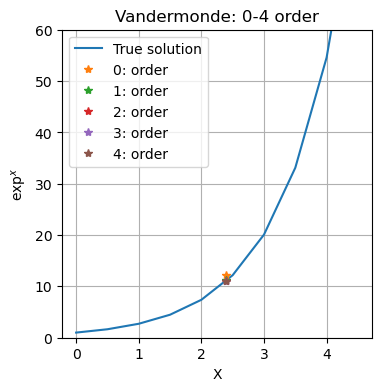

In [46]:
def vander_matrix(n,X,Y,value):
    ####Sort values
    diff = abs(value - X)
    sort_diff = np.sort(diff)
    diff_idx = np.argsort(diff)
    X_a = X[diff_idx]
    Y_a = Y[diff_idx]


    n = n+1
    A = np.zeros([n,n])
    b = np.zeros(n)
    for i in range(n):
        for j in range(n):
            if j == 0 :
                A[i,j] = 1
            else:
                A[i,j] = X_a[i] ** j
        b[i] = Y_a[i]
    coef = np.linalg.solve(A,b)
    result = np.polyval(np.flip(coef),value)
    return result, A, b,coef

#Plot and calculate
m = 5
xx = 2.4
Answer_V = np.zeros(m)
et_v = np.zeros(m)
ea_v = np.zeros(m)
for i in range(m):
    Answer_V[i], A, b,coef = vander_matrix(i,X_a,Y_a,xx)
    et_v[i] = ((true - Answer_V[i]) / true) * 100
for i in range(m-1):
    ea_v[i+1] = ((Answer_V[i+1] - Answer_V[i]) / Answer_V[i+1]) * 100
for i in range(m):
    print("Order #:", i,"Values:", Answer_V[i], "True Error:", et_v[i], "Approx error:", ea_v[i])


plt.figure(figsize = (4,4))
plt.plot(X_a, Y_a, label = "True solution");
plt.title("Vandermonde: 0-4 order")
for i in range(m):  
    plt.plot(2.4, Answer_V[i], '*', label = f"{i}: order")
plt.xlabel("X")
plt.ylabel(r"$\exp^{x}$")
plt.ylim(0,60)
plt.grid()
plt.legend()
plt.show()



#### Newton IP Method

/var/folders/pg/7m2wh1ds7xg4d6mlrnk71z580000gn/T/ipykernel_63650/2242642871.py:53: RuntimeWarning: invalid value encountered in double_scalars
  ea_n[i] = ((Answer_n[i+1] - Answer_n[i]) / Answer_n[i+1]) * 100


Order #: 0 Values: 4.113862099360613 True Error: 62.679885023111936 Approx error: nan
Order #: 1 Values: 7.9519163973367775 True Error: 27.86184197050887 Approx error: 48.26577778485686
Order #: 2 Values: 10.275755361122673 True Error: 6.780450513624303 Approx error: 22.61477509067524
Order #: 3 Values: 10.954141055593004 True Error: 0.6262743393077901 Approx error: 6.19296110053246
Order #: 4 Values: 11.024554372351668 True Error: -0.012500858758718926 Approx error: 0.6386953556621993


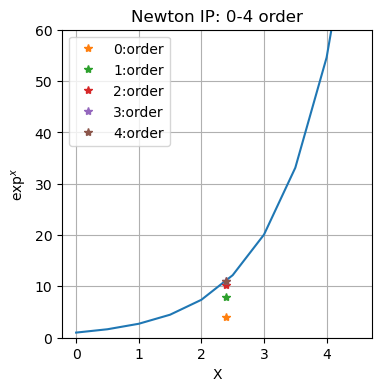

In [48]:
dx = 0.5
X_n = np.arange(0,5,dx)
Y_n = np.zeros(X_n.shape)
for k, xk in enumerate(X_n):
    Y_n[k] = exp(xk)
n = 4+1
xx = 2.4


def divide_diff(X,Y,n,xx,y0):
    ####Sort values
    # diff = abs(xx - X)
    # sort_diff = np.sort(diff)
    # diff_idx = np.argsort(diff)
    # X = X[diff_idx]
    # Y = Y[diff_idx]



    dd = np.zeros([n,n])
    for i in range(n):
        for j in range(n-i):
            dd[i,j] = (Y[j+1] - Y[j]) / (X[i+j+1] - X[j])
        Y = dd[i,:]

    coef = dd[:,0]
    sum = y0
    result = np.zeros(n)
    T = 1.
    #single value algorithm
    for i in range(n):
        T *= (xx - X[i])
        result[i] = coef[i] * T
        sum += result[i]
    #Array Algorithm
    # temp = np.zeros(xx.shape)
    # for i in range(n):
    #     temp = (xx - X[i])
    #     T *= temp
    #     result = coef[i] * T


    return sum


####Plot and compute
answer_n = divide_diff(X_n,Y_n,n,xx,Y_n[0])
answer_n
Answer_n = np.zeros(n)
et_n = np.zeros(n)
ea_n = np.zeros(n)
for i in range(n-1):
    ea_n[i] = ((Answer_n[i+1] - Answer_n[i]) / Answer_n[i+1]) * 100
plt.figure(figsize = (4,4))
plt.plot(X_a, Y_a)
plt.ylim(0,60)
plt.title("Newton IP: 0-4 order")
for i in range(n):
    Answer_n[i] = divide_diff(X_n,Y_n,i+1,xx,Y_n[0])
    et_n[i] = ((true - Answer_n[i]) / true) * 100
    plt.plot(2.4, Answer_n[i], '*', label = f"{i}:order")

for i in range(n-1):
    ea_n[i+1] = ((Answer_n[i+1] - Answer_n[i]) / Answer_n[i+1]) * 100
for i in range(n):
    print("Order #:", i,"Values:", Answer_n[i], "True Error:", et_n[i], "Approx error:", ea_n[i])
plt.xlabel("X")
plt.ylabel(r"$\exp^{x}$")
plt.legend()
plt.grid()
plt.show()

#### Lagrange IP Method

Order #: 0 Values: 0.0 True Error: 100.0 Approx error: 0.0
Order #: 1 Values: 12.182493960703471 True Error: -10.517091807564768 Approx error: 100.0
Order #: 2 Values: 11.223806388348907 True Error: -1.8200743667645962 Approx error: -8.541554791516623
Order #: 3 Values: 10.975037980291997 True Error: 0.4367017154342247 Approx error: -2.2666746894509666
Order #: 4 Values: 11.014191076852992 True Error: 0.08151283693860878 Approx error: 0.35547863921915424


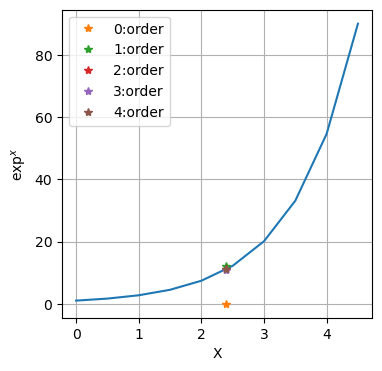

In [49]:
########
#LAgrange polynomial interpolation

dx = 0.5
X_l = np.arange(0,5,dx)
Y_l = np.zeros(X_l.shape)
for k, xk in enumerate(X_l):
    Y_l[k] = exp(xk)
n = 4+1
xx = 2.4

def lagrange(x,y,n,xx):
    ####Sort values
    diff = abs(xx - x)
    sort_diff = np.sort(diff)
    diff_idx = np.argsort(diff)
    x = x[diff_idx]
    y = y[diff_idx]



    sum = 0
    for i in range(n):
        product = y[i]
        for j in range(n):
            if i != j:
                product *= (xx - x[j]) / (x[i] - x[j])
        sum += product
    return sum
    
#Plot and compute
Answer_L = np.zeros(n)
et_l = np.zeros(n)
ea_l = np.zeros(n)
plt.figure(figsize=(4,4))
plt.plot(X_a,Y_a)
for i in range(n):
    Answer_L[i] = lagrange(X_l,Y_l,i,xx)
    et_l[i] = ((true - Answer_L[i]) / true) * 100
    plt.plot(2.4,Answer_L[i], '*', label=f"{i}:order")
for i in range(n-1):
        ea_l[i+1] = ((Answer_L[i+1] - Answer_L[i]) / Answer_L[i+1]) * 100
for i in range(n):
    print("Order #:", i,"Values:", Answer_L[i], "True Error:", et_l[i], "Approx error:", ea_l[i])
plt.xlabel("X")
plt.ylabel(r"$\exp^{x}$")
plt.legend()
plt.grid()
plt.show()


#### Plots to compare methods and error

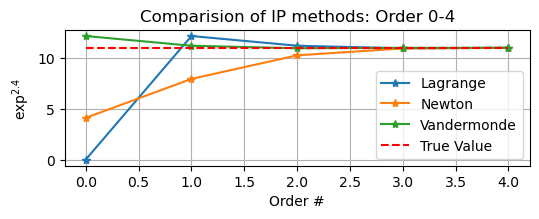

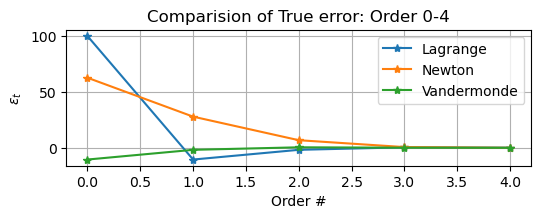

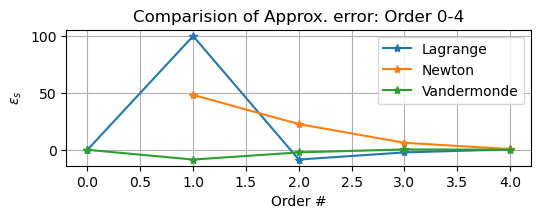

In [50]:
#Plot exp(2.4) against order #
n = 4+1
ord = np.arange(0,n,1)
def plot_comp():
    plt.figure(figsize=(6,6))
    plt.subplot(3,1,1)
    plt.plot(ord,Answer_L,'*-', label = f"Lagrange")
    plt.plot(ord,Answer_n,'*-', label = f"Newton")
    plt.plot(ord,Answer_V,'*-', label = f"Vandermonde")
    # plt.plot(2.4, np.exp(2.4), '*', label = f"True Solution")
    plt.hlines(np.exp(2.4),0,4,colors = 'r',linestyles='--', label = f"True Value")
    plt.xlabel("Order #")
    plt.ylabel(r"$\exp^{2.4}$")
    plt.title("Comparision of IP methods: Order 0-4")
    plt.legend()
    plt.grid()
    plt.show()
    plt.figure(figsize=(6,6))
    plt.subplot(3,1,2)
    plt.plot(ord,et_l,'*-', label = f"Lagrange")
    plt.plot(ord,et_n,'*-', label = f"Newton")
    plt.plot(ord,et_v,'*-', label = f"Vandermonde")
    plt.xlabel("Order #")
    plt.ylabel(r"$\epsilon_{t}$")
    plt.title("Comparision of True error: Order 0-4")
    plt.legend()
    plt.grid()
    plt.show()
    plt.figure(figsize=(6,6))
    plt.subplot(3,1,3)
    plt.plot(ord,ea_l,'*-', label = f"Lagrange")
    plt.plot(ord,ea_n,'*-', label = f"Newton")
    plt.plot(ord,ea_v,'*-', label = f"Vandermonde")
    plt.xlabel("Order #")
    plt.ylabel(r"$\epsilon_{s}$")
    plt.title("Comparision of Approx. error: Order 0-4")
    plt.legend()
    plt.grid()
    plt.show()
plot_comp()
